In [11]:
import pandas as pd


In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt


In [14]:
import statsmodels.api as sm
from scipy import stats

In [15]:
#Cargar Dataset

df = pd.read_csv('data_marketing.csv')
print(df.head())

   Unnamed: 0  youtube  facebook  newspaper  sales
0           1   276.12     45.36      83.04  26.52
1           2    53.40     47.16      54.12  12.48
2           3    20.64     55.08      83.16  11.16
3           4   181.80     49.56      70.20  22.20
4           5   216.96     12.96      70.08  15.48


In [16]:
#Eliminar columna "Unnamed"

df = df.drop(columns=['Unnamed: 0'])
print(df.head())

   youtube  facebook  newspaper  sales
0   276.12     45.36      83.04  26.52
1    53.40     47.16      54.12  12.48
2    20.64     55.08      83.16  11.16
3   181.80     49.56      70.20  22.20
4   216.96     12.96      70.08  15.48


**Analisis Exploratorio (EDA)**

**Graficos de dispersion para ver relaciones y fuerzas de relacion (Correlacion)**

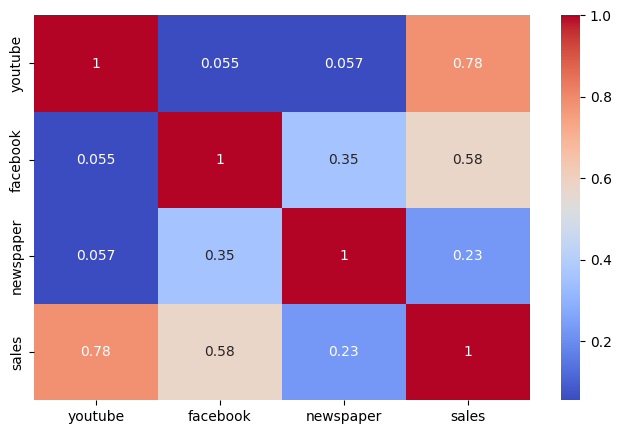

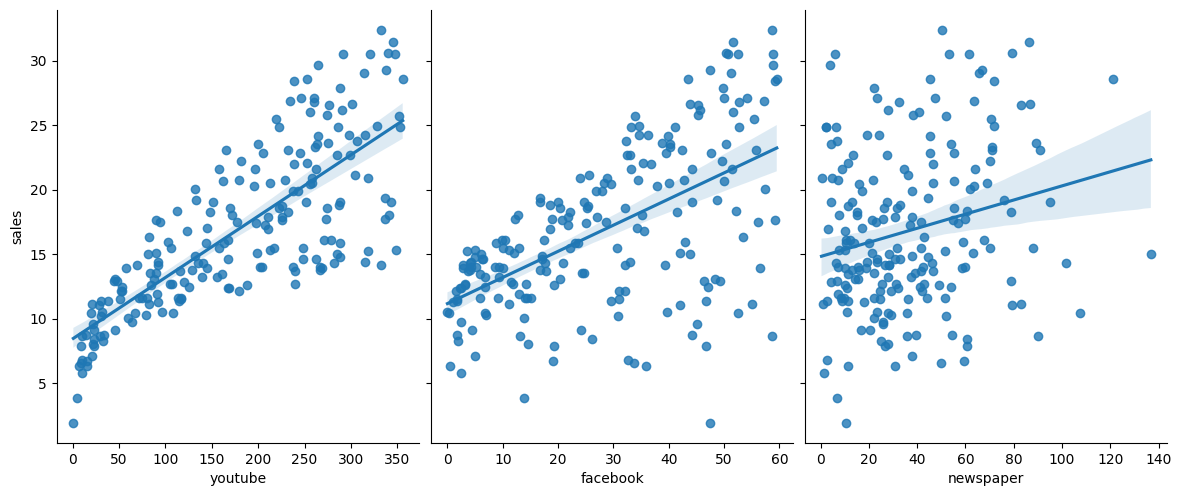

In [17]:
#Relacion Publicidad/Ventas

plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

#Relacion visual (Grafico de puntos)

sns.pairplot(df,x_vars=['youtube','facebook','newspaper'],y_vars='sales',height=5,aspect=0.8,kind='reg')
plt.show()

In [18]:
#Definir quien es quien.

X = df[['youtube','facebook','newspaper']]
y = df['sales']

#Constante y modelo.

X = sm.add_constant(X)
modelo = sm.OLS(y,X).fit()

#Tabla de resultados

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 05 Feb 2026   Prob (F-statistic):           1.58e-96
Time:                        08:00:17   Log-Likelihood:                -422.65
No. Observations:                 200   AIC:                             853.3
Df Residuals:                     196   BIC:                             866.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5267      0.374      9.422      0.0

**Analisis de Supuestos**.

A) **Indepedencia:** Se cumple ya que el valor de **Durbin-Watson** es 2.084.Esto indica que no hay autocorrelacion significativa en los residuos.

B) **Normalidad:**: El valor **Prob(JB)** es muy pequeño. Esto indica que los errores no son perfectamente normales, pero al tener 200 datos, el modelo funciona bien para prediccion de ventas que es su fin.

C) **Linealidad:** Los graficos lineales antes desplegados demuestran mayor concentracion (Por ende relacion) en **Youtube** y **Facebook**.

D)**Homocedasticidad:**:Al revisar los resultados el error se dislumbra estable lo cual indica que hay un equilibrio en el modelo.


**Interpretacion de resultados.**

**¿Que tan efectivo es el modelo?:** **El valor R-Squared es 0.897**.Esto significa que nuestro modelo acierta casi el 90% de las veces al explicar las ventas, lo cual es un resultado alto y plenamente confiable.

¿**Quienes ganan la partida?:** **Youtube y Facebook:** **Tienen un p-value de 0.000** .Esto ayuda a concluir que estas plataformas si aumentan las ventas de manera real y significativa.

**Newspaper:Tiene un p-value de 0.860.** Al ser mayor a (0.05) un valor de referencia estandar nos indica que invertir en este rubro no genera ningun redito palpable en el objetivo de aumentar las ventas que es el fin de este estudio.

**¿Cuanto ganamos?:** Por cada dolar invertido en **Facebook**, las ventan aumentan **0.18** unidades, que en **Youtube** sube **0.04**.

Lo cual permite llegar a la conclusion de que dentro de la rentabilidad comprobada de ambos **Facebook** es el mas eficiente de ambos.

**Conclusion General:** Basado en este estudio, se recomienda a la empresa concentrar su presupuesto publicitario en los medios digitales especificamente en **Facebook** por su mayor eficiencia en la relacion inversion/ventas. A su vez la inversion en **Newspaper** deberia ser eliminada de este presupuesto ya que no hay un beneficio palpable para los objetivos comerciales de la empresa.